In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test_out = pd.read_csv('gender_submission.csv')

In [281]:
test_out.shape

(418, 2)

In [282]:
test.shape

(418, 11)

In [283]:
test = pd.merge(test, test_out, on='PassengerId', how='inner')
test = test.dropna()

In [284]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [285]:

train = train.dropna(subset=['Embarked'])

In [286]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [287]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [288]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [289]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [290]:
X = train.drop(columns=['Survived','Cabin','Name','PassengerId','Ticket'])
y = train['Survived']

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)

In [292]:
X_train['Age'] = X_train['Age'].interpolate(method='linear')

In [293]:
tamean = X_train['Age'].mean()
X_valid['Age'] = X_valid['Age'].fillna(tamean)

In [294]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(755, 7) (755,) (134, 7) (134,)


In [295]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [296]:
X_valid.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [297]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [298]:
X_train = pd.get_dummies(X_train,columns=['Sex','Embarked'],drop_first=True)
X_valid = pd.get_dummies(X_valid,columns=['Sex','Embarked'],drop_first=True)

### Feature Selection

In [299]:
from sklearn.tree import DecisionTreeClassifier

featureselection = DecisionTreeClassifier()
featureselection.fit(X_train,y_train)

DecisionTreeClassifier()

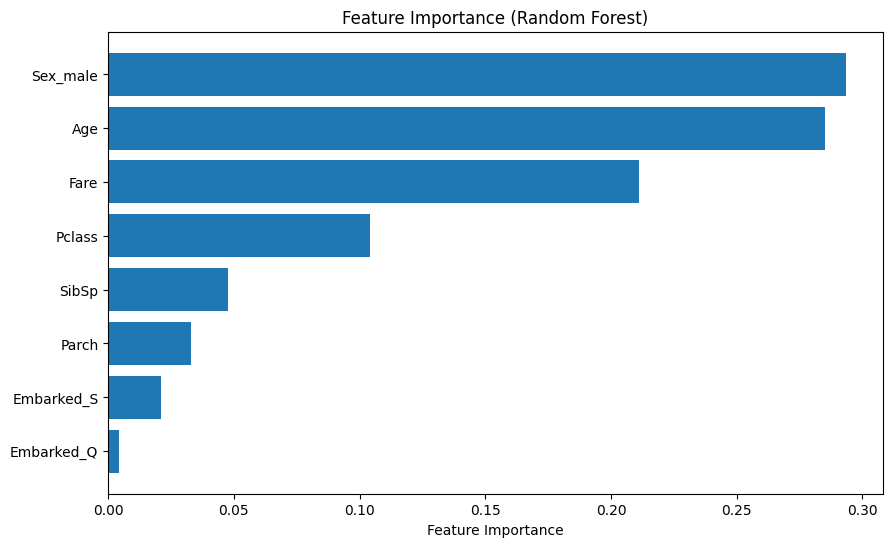

In [300]:
feature_importances = featureselection.feature_importances_

# Define feature names manually or access them from wherever you defined them
feature_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S']  # Replace with your actual feature names

# Sort feature names by importances
sorted_feature_names = [x for _, x in sorted(zip(feature_importances, feature_names), reverse=True)]

# Sort the importances accordingly
sorted_importances = np.sort(feature_importances)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [301]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [302]:
X_train = X_train[['Age','Sex_male','Fare','Pclass']]
X_valid = X_valid[['Age','Sex_male','Fare','Pclass']]

### Model Selection

In [303]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

def train_model(models, X_train, y_train,X_valid,y_valid):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_valid, y_valid)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_valid,y_valid)

Accuracy % of GaussianNB: 0.8134328358208955
----------------------------------------------
Accuracy % of MultinomialNB: 0.7313432835820896
----------------------------------------------
Accuracy % of BernoulliNB: 0.8134328358208955
----------------------------------------------


### Hyperparameter Tunning

In [304]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
bernoulli_nb = BernoulliNB()
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 0.1}
Best Cross-Validation Score: 0.78


### Model Training & Validation

In [305]:
model = BernoulliNB(alpha=0.1)
model.fit(X_train,y_train)

BernoulliNB(alpha=0.1)

In [306]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
score=cross_val_score(model,X_valid,y_valid,cv=kf)
print(model)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

BernoulliNB(alpha=0.1)
Cross Validation Scores are [0.92592593 0.77777778 0.74074074 0.77777778 0.84615385]
Average Cross Validation score :0.8136752136752137


In [307]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = model.predict(X_valid)
print("Precision = ",format(precision_score(y_valid,prediction)))
print("Recall = ",format(recall_score(y_valid,prediction)))
print("F-1 Score = ",format(f1_score(y_valid,prediction)))

Precision =  0.7291666666666666
Recall =  0.7446808510638298
F-1 Score =  0.7368421052631579


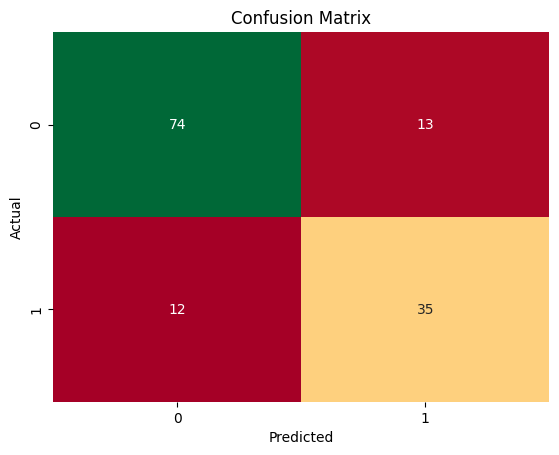

In [308]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Testing

In [309]:
X = test.drop(columns=['Survived'])
y_test = test['Survived']

In [310]:
X_test = X.drop(columns=['Cabin','Name','PassengerId','Ticket'])

In [311]:
X_test = pd.get_dummies(X_test,columns=['Sex','Embarked'],drop_first=True)

In [312]:
X_test = X_test[['Age','Sex_male','Fare','Pclass']]

In [313]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}".format(accuracy))

Test Accuracy: 1.00


In [315]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = model.predict(X_test)
print("Precision = ",format(precision_score(y_test,prediction)))
print("Recall = ",format(recall_score(y_test,prediction)))
print("F-1 Score = ",format(f1_score(y_test,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


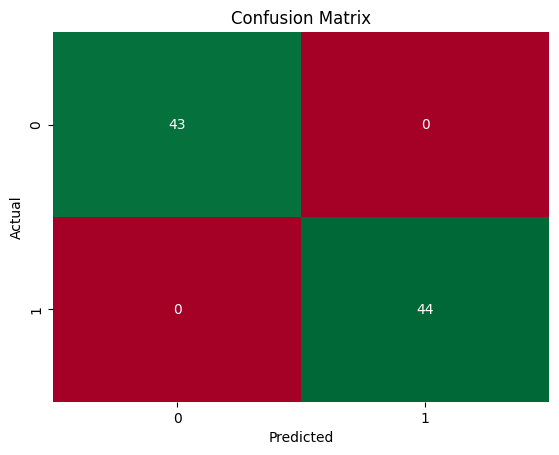

In [316]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()